<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/toraj69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import glob
file_list = glob.glob('/content/*.png')

In [3]:
X = np.zeros((1,784))
for file in file_list:
  img = cv2.imread(file,0)
  img = img.reshape(1,img.shape[0]*img.shape[1])
  X = np.concatenate((X,img),axis=0)

X = X[1:,:]

In [4]:
def normalization(X):

    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0) + 1e-9  # avoid zeros
    
    X_norm = (X - mean)/(std)
    
    return X_norm , mean , std

In [5]:
def denormalization(X_norm , mean , std):
    
    X = (X_norm * std) + mean
    
    return X

In [6]:
def pca(x):
  sigma = np.dot(x.T,x)
  val,vec=np.linalg.eig(sigma)
  vec = np.real(vec)
  return vec

In [7]:
def project_data(x,u,k):
  u_reduced = u[:,0:k]
  z = np.dot(x,u_reduced)
  return z

In [8]:
def recover_data(z,u,k):
  u_reduced = u[:,0:k]
  x = np.dot(z,u_reduced.T)
  return x

In [9]:
X_norm , mean , std = normalization(X)

In [10]:
u = pca(X_norm)

In [11]:
Z = project_data(X_norm,u,20)

In [12]:
X_rec = recover_data(Z,u,20)

In [13]:
X_rec.shape

(100, 784)

In [14]:
X_rec2 = denormalization(X_rec,mean,std)

In [15]:

def display_data(X):
  m,n=X.shape
  image_side=28
  for i in range(m):
    image=X[i].reshape(image_side,image_side)
    plt.subplot(10,10,i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
  

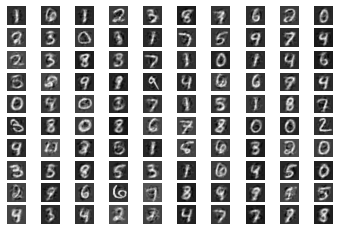

In [16]:
display_data(X_rec2)

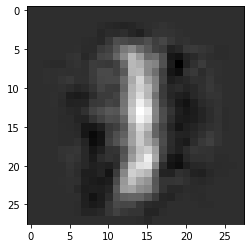

In [17]:
img = X_rec2[0].reshape(28,28)
plt.imshow(img,cmap='gray')
plt.show()

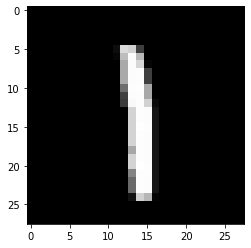

In [18]:
img = X[0].reshape(28,28)
plt.imshow(img,cmap='gray')
plt.show()